<a href="https://colab.research.google.com/github/Fatema2525/machine-learning-and-deep-learning-projects/blob/main/Face_Mask_Detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install kaggle

In [22]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [25]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [27]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2005.jpg', 'with_mask_2023.jpg', 'with_mask_1617.jpg', 'with_mask_2175.jpg', 'with_mask_3034.jpg']
['with_mask_1993.jpg', 'with_mask_3633.jpg', 'with_mask_911.jpg', 'with_mask_75.jpg', 'with_mask_2078.jpg']


In [28]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1278.jpg', 'without_mask_3195.jpg', 'without_mask_937.jpg', 'without_mask_1800.jpg', 'without_mask_65.jpg']
['without_mask_1303.jpg', 'without_mask_766.jpg', 'without_mask_1578.jpg', 'without_mask_2689.jpg', 'without_mask_838.jpg']


In [29]:
print('Number of mask images:',len(with_mask_files))
print('Number of images without mask:',len(without_mask_files))

Number of mask images: 3725
Number of images without mask: 3828


In [30]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [31]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [32]:
labels = with_mask_labels + without_mask_labels

In [33]:
len(labels)

7553

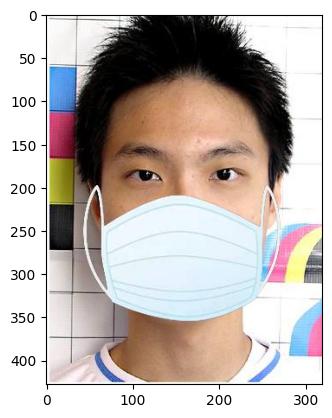

In [34]:
img = mpimg.imread('/content/data/with_mask/with_mask_937.jpg')
img_plot = plt.imshow(img)
plt.show()

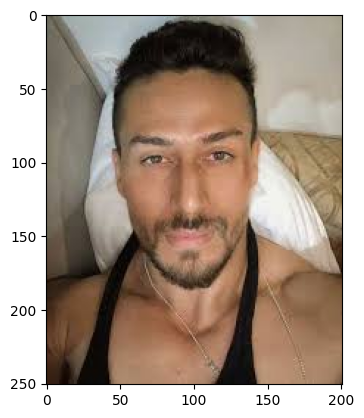

In [35]:
img = mpimg.imread('/content/data/without_mask/without_mask_766.jpg')
img_plot = plt.imshow(img)
plt.show()

In [40]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [41]:
type(data)

list

In [42]:
len(data)

7553

In [43]:
print(data[0])

[[[235 186 127]
  [233 183 124]
  [229 181 122]
  ...
  [255 205  96]
  [254 203  94]
  [252 201  91]]

 [[238 189 130]
  [236 186 127]
  [233 185 126]
  ...
  [254 202  95]
  [255 202  95]
  [255 201  94]]

 [[236 187 128]
  [235 187 128]
  [234 188 129]
  ...
  [253 197  93]
  [250 194  90]
  [247 189  85]]

 ...

 [[174  14  42]
  [173  14  43]
  [174  13  44]
  ...
  [225  48 102]
  [228  53 102]
  [228  52  99]]

 [[174  14  42]
  [174  13  43]
  [174  12  44]
  ...
  [225  48 101]
  [227  51  99]
  [228  52  98]]

 [[176  16  44]
  [177  16  46]
  [178  16  48]
  ...
  [229  52 105]
  [229  53 101]
  [230  54 100]]]


In [44]:
type(data[0])

numpy.ndarray

In [45]:
data[0].shape

(128, 128, 3)

In [46]:
X = np.array(data)
Y = np.array(labels)

In [47]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [50]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [51]:
X_train[0]
X_train_scaled[0]

array([[[0.98823529, 0.99215686, 0.98823529],
        [0.99607843, 0.99607843, 0.99607843],
        [0.95294118, 0.94509804, 0.94509804],
        ...,
        [0.47058824, 0.43529412, 0.41960784],
        [0.49411765, 0.4627451 , 0.42352941],
        [0.69019608, 0.6627451 , 0.61176471]],

       [[0.99215686, 0.99607843, 0.99215686],
        [0.99215686, 0.99607843, 0.99607843],
        [0.96862745, 0.96470588, 0.96078431],
        ...,
        [0.56078431, 0.54117647, 0.51764706],
        [0.47843137, 0.4627451 , 0.41960784],
        [0.59607843, 0.58039216, 0.5254902 ]],

       [[0.99215686, 0.99607843, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.96470588, 0.95686275, 0.95294118],
        ...,
        [0.5372549 , 0.51764706, 0.49411765],
        [0.4       , 0.38823529, 0.34117647],
        [0.41960784, 0.40784314, 0.35294118]],

       ...,

       [[0.99215686, 1.        , 0.98039216],
        [1.        , 1.        , 0.98823529],
        [0.84705882, 0

**Building a Convolutional Neural Network(CNN)**

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 163s 942ms/step - accuracy: 0.7294 - loss: 0.6319 - val_accuracy: 0.8727 - val_loss: 0.2977
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 194s 891ms/step - accuracy: 0.8841 - loss: 0.3090 - val_accuracy: 0.8793 - val_loss: 0.2704
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 756ms/step - accuracy: 0.9013 - loss: 0.2364 - val_accuracy: 0.8959 - val_loss: 0.2430
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 759ms/step - accuracy: 0.9292 - loss: 0.1934 - val_accuracy: 0.9107 - val_loss: 0.2189
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 747ms/step - accuracy: 0.9344 - loss: 0.1614 - val_accuracy: 0.9124 - val_loss: 0.2634


In [59]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("Test accuracy:",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.9206 - loss: 0.2179
Test accuracy: 0.9252150654792786


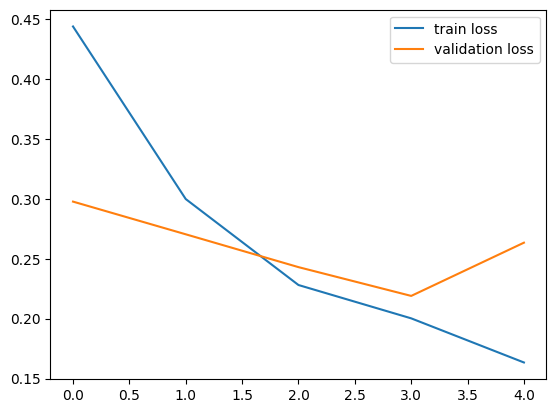

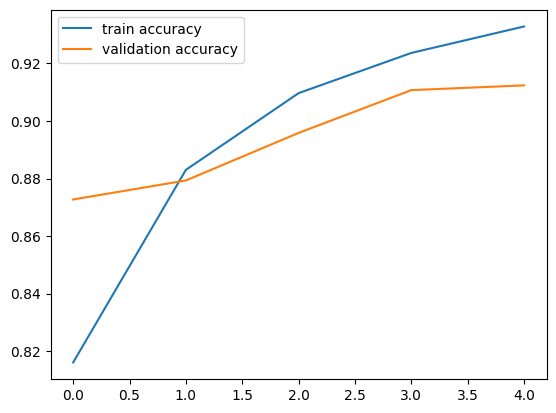

In [61]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()